# market basket analysis



In [4]:
##import packages for data visualization and do #apriori algorithm

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
import warnings
warnings.filterwarnings("ignore", message="Specific warning message you want to ignore")


import seaborn as sns

C:\Users\Saliha\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Saliha\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [6]:
##loading the dataset

In [7]:
data=pd.read_excel("Assignment-1_Data.xlsx")
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
data['BillNo'] =  data['BillNo'].astype('str')
data= data[~data['BillNo'].str.contains('C')]

In [9]:
##data preprocessing

In [10]:
###identifying any duplicates entry in the dataset

In [11]:
df = pd.DataFrame(data)
df= df.drop_duplicates()

In [12]:
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [13]:
if df.duplicated().any().any():
    print("Duplicates found in the dataset")
else:
    print("No duplicates found in the dataset")

No duplicates found in the dataset


In [14]:
##identifying any missing data found in the dataset

In [15]:
missing_values = data.isnull().sum()

In [16]:
missing_values

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [17]:
##filling the missing data using mode function in the respected columns

In [18]:
data_cleaned = df.dropna(subset=["CustomerID"])
mode_itemname = data_cleaned['Itemname'].mode()[0]
data_cleaned = data_cleaned.copy() 
data_cleaned['Itemname'].fillna(mode_itemname, inplace=True)
data_cleaned.head()



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
data_cleaned.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [20]:
df=data_cleaned

In [21]:
## top 25 frequently bought items by customer

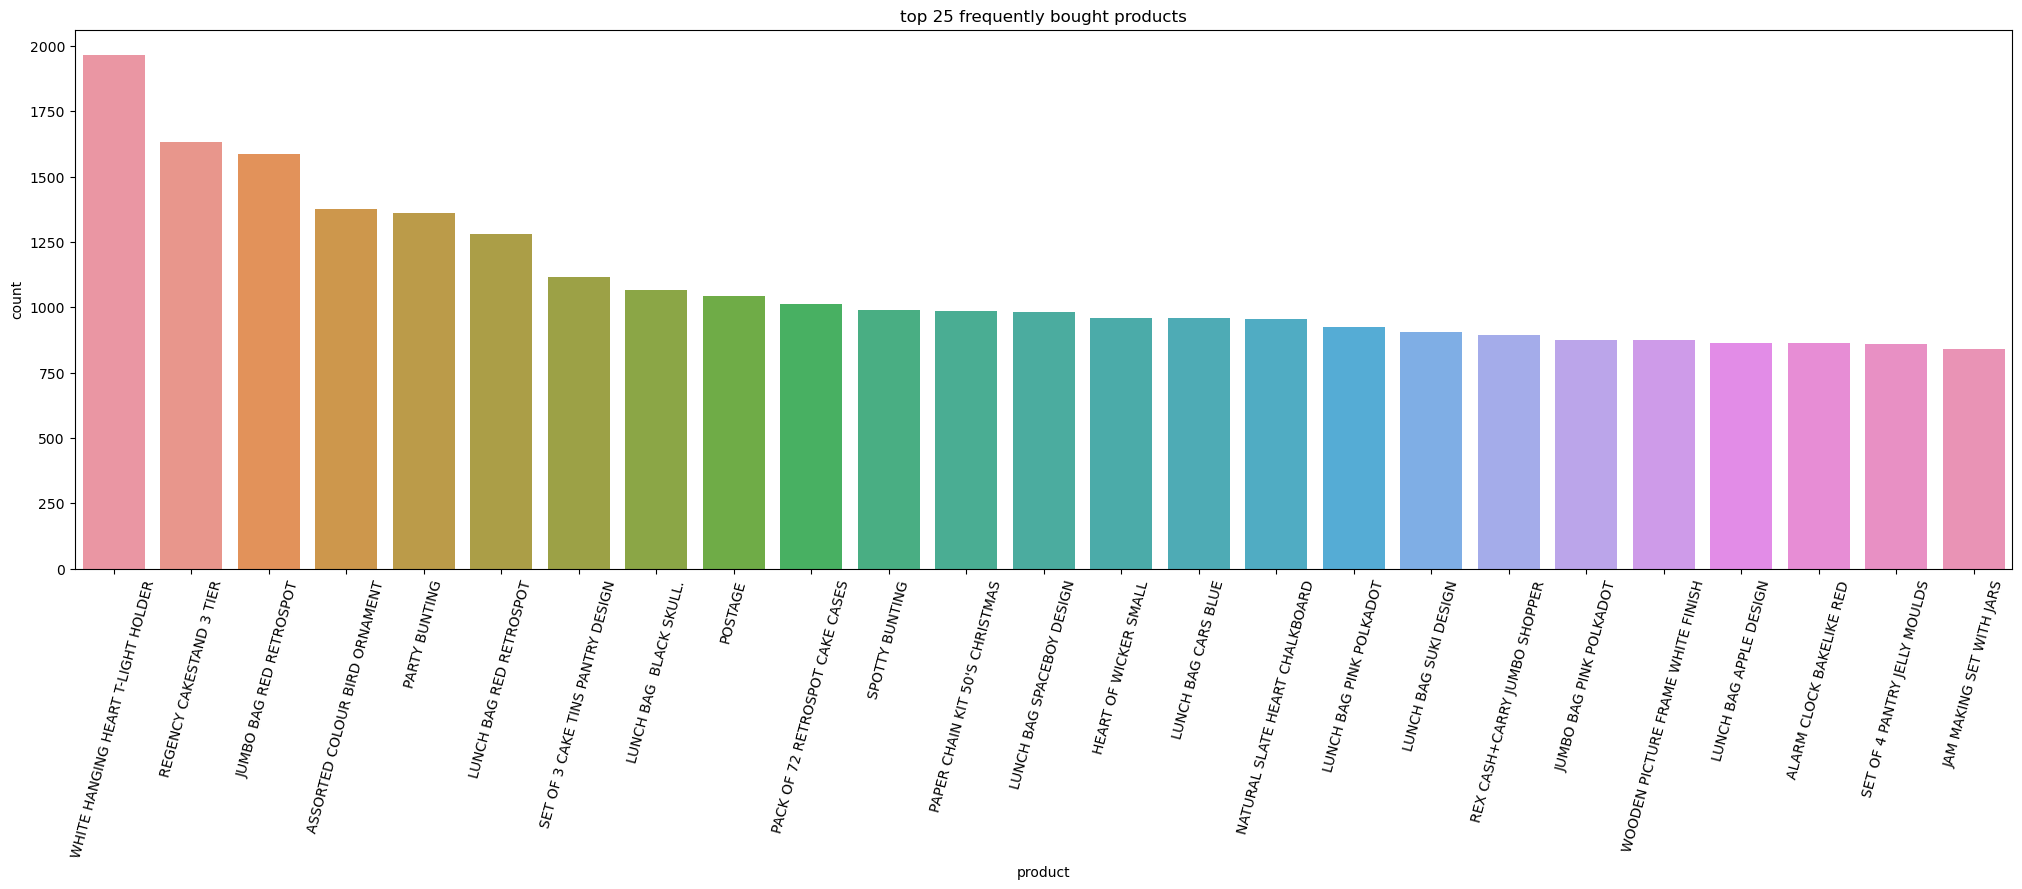

In [22]:
plt.rcParams['figure.figsize']=25,7
sns.countplot(data=df,x=df['Itemname'],order=df['Itemname'].value_counts().head(25).index)
plt.xticks(rotation=75)
plt.xlabel('product')
plt.title('top 25 frequently bought products')
plt.show()

In [23]:
# calculating the sales trend based on the year

Text(0.5, 0, 'Date(month)')

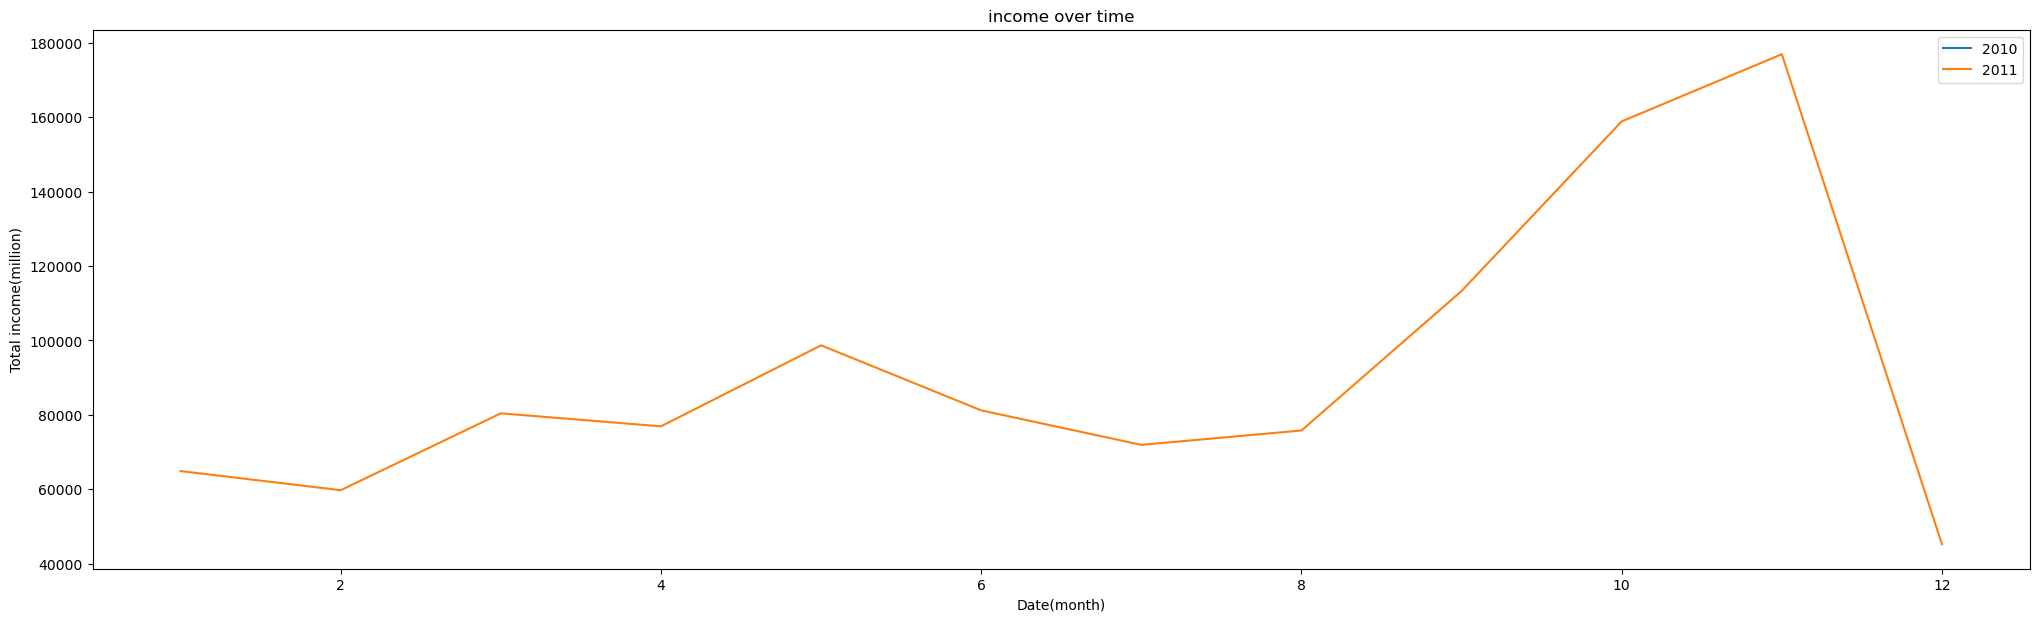

In [24]:
df[df["Date"].dt.year==2010].groupby(df["Date"].dt.month)["Price"].sum().plot()
df[df["Date"].dt.year==2011].groupby(df["Date"].dt.month)["Price"].sum().plot()
plt.legend(['2010','2011'])
plt.title("income over time")
plt.ylabel('Total income(million)')
plt.xlabel("Date(month)")

In [25]:
##assign the original dataframe to df2

In [26]:
df2=df
#filter rows based on item occurences
item_counts=df2['Itemname'].value_counts(ascending=False)
filtered_items=item_counts.loc[item_counts >1].reset_index()['index']
df2=df2[df2['Itemname'].isin(filtered_items)]
#filter rows based on bill number occurences

bill_counts=df2['BillNo'].value_counts(ascending=False)
filtered_bills=bill_counts.loc[bill_counts > 1].reset_index()['index']
df2=df2[df2['BillNo'].isin(filtered_bills)]

In [27]:
df2

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# generate association rules


In [28]:
basket = (df2[df2['Country'] == 'Germany' ].groupby(['BillNo','Itemname'])['Quantity'].sum().unstack().fillna(0))

In [29]:
basket


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df2 = df2[df2['Country'] == 'Germany']
df2


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
1099,536527,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1100,536527,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
1101,536527,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
1102,536527,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
1103,536527,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany
...,...,...,...,...,...,...,...
521956,581578,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany
521957,581578,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany
521958,581578,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany
521959,581578,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany


In [31]:
# Create a pivot table using the filtered DataFrame
pivot_table = pd.pivot_table(df2[['BillNo','Itemname']], index='BillNo', columns='Itemname', aggfunc=lambda x: True, fill_value=False)

In [32]:
pivot_table

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:

# Generate frequent itemsets with minimum support of 0.1 (10%)
frequent_itemsets = apriori(pivot_table, min_support=0.05,use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, "confidence", min_threshold = 0.5)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
rules

Frequent Itemsets:
      support                                           itemsets
0    0.108295                           (6 RIBBONS RUSTIC CHARM)
1    0.073733                        (ALARM CLOCK BAKELIKE PINK)
2    0.050691                            (BLUE HARMONICA IN BOX)
3    0.050691                                (BLUE POLKADOT CUP)
4    0.069124                      (CHARLOTTE BAG APPLES DESIGN)
..        ...                                                ...
113  0.069124  (ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE, ...
114  0.057604  (RED RETROSPOT CHARLOTTE BAG, WOODLAND CHARLOT...
115  0.131336  (ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE, ...
116  0.064516  (ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE, ...
117  0.062212  (ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE, ...

[118 rows x 2 columns]

Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.108295,0.843318,0.096774,0.893617,1.059644,0.005447,1.472811,0.063123
1,(ALARM CLOCK BAKELIKE PINK),(POSTAGE),0.073733,0.843318,0.052995,0.718750,0.852288,-0.009185,0.557092,-0.157617
2,(BLUE HARMONICA IN BOX),(POSTAGE),0.050691,0.843318,0.050691,1.000000,1.185792,0.007942,inf,0.165049
3,(CHARLOTTE BAG APPLES DESIGN),(POSTAGE),0.069124,0.843318,0.064516,0.933333,1.106740,0.006222,2.350230,0.103607
4,(COFFEE MUG APPLES DESIGN),(POSTAGE),0.064516,0.843318,0.057604,0.892857,1.058743,0.003196,1.462366,0.059310
...,...,...,...,...,...,...,...,...,...,...
65,"(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY ...",(POSTAGE),0.073733,0.843318,0.064516,0.875000,1.037568,0.002336,1.253456,0.039090
66,"(POSTAGE, SPACEBOY LUNCH BOX)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.096774,0.258065,0.064516,0.666667,2.583333,0.039542,2.225806,0.678571
67,(SPACEBOY LUNCH BOX),"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)",0.108295,0.237327,0.064516,0.595745,2.510225,0.038815,1.886612,0.674695
68,"(ROUND SNACK BOXES SET OF4 WOODLAND, WOODLAND ...",(POSTAGE),0.066820,0.843318,0.062212,0.931034,1.104014,0.005861,2.271889,0.100960


In [34]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(BLUE HARMONICA IN BOX),(POSTAGE),0.050691,0.843318,0.050691,1.000000,1.185792,0.007942,inf,0.165049
23,(PLASTERS IN TIN STRONGMAN),(POSTAGE),0.073733,0.843318,0.071429,0.968750,1.148736,0.009248,5.013825,0.139785
32,(RETROSPOT TEA SET CERAMIC 11 PC),(POSTAGE),0.059908,0.843318,0.057604,0.961538,1.140185,0.007082,4.073733,0.130784
33,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.165899,0.843318,0.158986,0.958333,1.136384,0.019081,3.760369,0.143887
49,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...",(POSTAGE),0.052995,0.843318,0.050691,0.956522,1.134236,0.005999,3.603687,0.124972
...,...,...,...,...,...,...,...,...,...,...
54,(PLASTERS IN TIN SPACEBOY),"(POSTAGE, PLASTERS IN TIN WOODLAND ANIMALS)",0.112903,0.124424,0.057604,0.510204,4.100529,0.043556,1.787634,0.852364
69,"(POSTAGE, WOODLAND CHARLOTTE BAG)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.122120,0.258065,0.062212,0.509434,1.974057,0.030697,1.512407,0.562069
63,(ROUND SNACK BOXES SET OF4 WOODLAND),"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",0.258065,0.158986,0.131336,0.508929,3.201087,0.090308,1.712610,0.926773
46,(WOODLAND CHARLOTTE BAG),(ROUND SNACK BOXES SET OF4 WOODLAND),0.133641,0.258065,0.066820,0.500000,1.937500,0.032332,1.483871,0.558511


In [35]:
rules.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.258065,0.843318,0.237327,0.919643,1.090505,0.019697,1.949821,0.111862
33,(ROUND SNACK BOXES SET OF 4 FRUITS),(POSTAGE),0.165899,0.843318,0.158986,0.958333,1.136384,0.019081,3.760369,0.143887
44,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.165899,0.258065,0.138249,0.833333,3.229167,0.095436,4.451613,0.827624
43,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.258065,0.165899,0.138249,0.535714,3.229167,0.095436,1.796526,0.930435
63,(ROUND SNACK BOXES SET OF4 WOODLAND),"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",0.258065,0.158986,0.131336,0.508929,3.201087,0.090308,1.712610,0.926773
...,...,...,...,...,...,...,...,...,...,...
10,(JUMBO BAG RED RETROSPOT),(JUMBO BAG WOODLAND ANIMALS),0.082949,0.103687,0.050691,0.611111,5.893827,0.042091,2.304806,0.905436
18,(PLASTERS IN TIN STRONGMAN),(PLASTERS IN TIN CIRCUS PARADE),0.073733,0.122120,0.050691,0.687500,5.629717,0.041687,2.809217,0.887834
37,(SKULL LUNCH BOX WITH CUTLERY),(POSTAGE),0.059908,0.843318,0.050691,0.846154,1.003363,0.000170,1.018433,0.003565
49,"(PLASTERS IN TIN CIRCUS PARADE, ROUND SNACK BO...",(POSTAGE),0.052995,0.843318,0.050691,0.956522,1.134236,0.005999,3.603687,0.124972


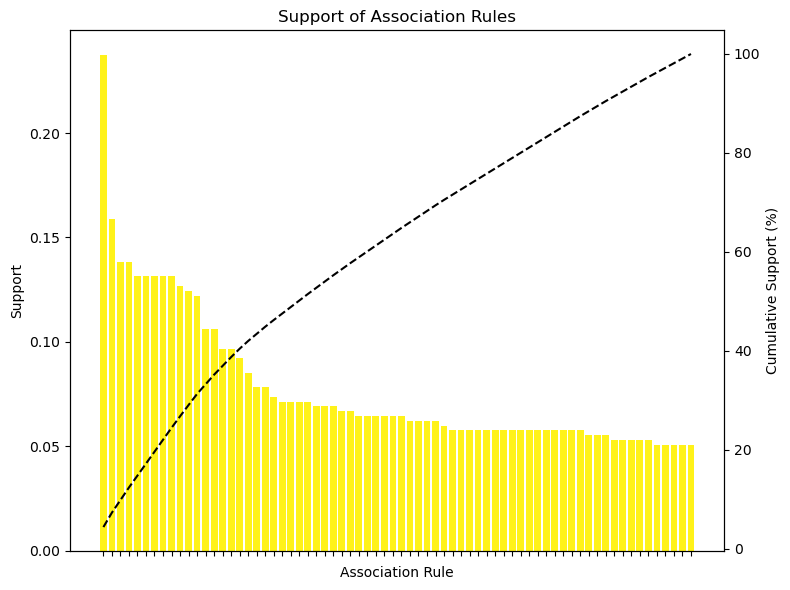

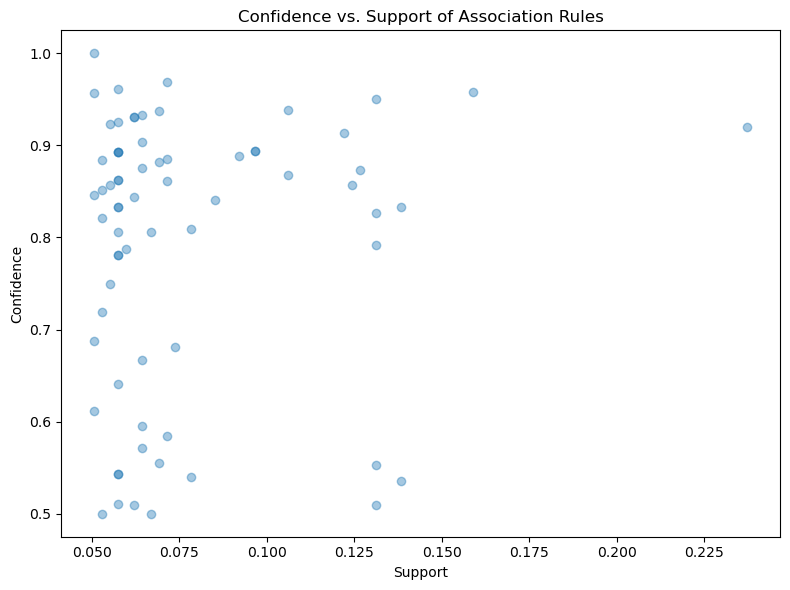

In [36]:
# Sort rules by support in descending order
sorted_rules = rules.sort_values(by='support', ascending=False)

# Calculate cumulative support
cumulative_support = np.cumsum(sorted_rules['support'] / np.sum(sorted_rules['support']) * 100)

# Bar plot for Support
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(range(len(sorted_rules)), sorted_rules['support'], align='center' ,color='#FFF219')


plt.xticks(range(len(sorted_rules)), ['' for _ in range(len(sorted_rules))])  # Remove x-axis labels
ax1.set_xlabel('Association Rule')
ax1.set_ylabel('Support')
ax1.set_title('Support of Association Rules')

# CDF plot for cumulative support
ax2 = ax1.twinx()
ax2.plot(range(len(sorted_rules)), cumulative_support, color='#000000', linestyle='--')
ax2.set_ylabel('Cumulative Support (%)', c='#000000')

plt.tight_layout()
plt.show()

# Scatter plot for Confidence vs. Support
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.4)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Confidence vs. Support of Association Rules')
plt.tight_layout()
plt.show()

In [37]:

# Filter association rules for cross-selling opportunities
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]

# Sort rules based on confidence and support
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top cross-selling recommendations
top_cross_selling = cross_selling_rules.head(5)

# Filter association rules for upselling opportunities
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]

# Sort rules based on confidence and support
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

# Select top upselling recommendations
top_upselling = upselling_rules.head(5)

# Display cross-selling recommendations
print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

# Display upselling recommendations
print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")

Cross-Selling Recommendations:
Customers who bought 'BLUE HARMONICA IN BOX' also bought 'POSTAGE'.
Customers who bought 'PLASTERS IN TIN STRONGMAN' also bought 'POSTAGE'.
Customers who bought 'RETROSPOT TEA SET CERAMIC 11 PC' also bought 'POSTAGE'.
Customers who bought 'ROUND SNACK BOXES SET OF 4 FRUITS' also bought 'POSTAGE'.
Customers who bought 'PLASTERS IN TIN SPACEBOY' also bought 'POSTAGE'.

Upselling Recommendations:
For customers who bought 'ROUND SNACK BOXES SET OF 4 FRUITS', recommend the following upgrades: ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE.
For customers who bought 'RED RETROSPOT CHARLOTTE BAG', recommend the following upgrades: POSTAGE, WOODLAND CHARLOTTE BAG.
For customers who bought 'SPACEBOY LUNCH BOX', recommend the following upgrades: ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE.
For customers who bought 'PLASTERS IN TIN SPACEBOY', recommend the following upgrades: POSTAGE, PLASTERS IN TIN WOODLAND ANIMALS.
For customers who bought 'ROUND SNACK BOXES SET OF4 

In [38]:
pip install pandoc


Note: you may need to restart the kernel to use updated packages.
